In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
bot=datasets.load_boston()
bot

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
data1=bot.data
c1=bot.feature_names
df=pd.DataFrame(data1,columns=c1)
df['Target']=bot.target
df.head(10)
df.shape

(506, 14)

In [4]:
X=df.drop('Target',axis=1)
y=df[['Target']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=75)
X_train.shape

(404, 13)

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)    # r2_score(actual data, predict data)

0.714070904009273

### cross validation

In [8]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y,cv=5)
score

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

### Polynomial Regression

In [25]:
import pandas as pd
import numpy as np
d={'empexp':[1,2,3,4,5,6,7,8,9,10],'sal':[4500,5000,6000,8000,11000,15000,20000,30000,50000,100000]}
df=pd.DataFrame(d)
df.head()

,empexp,sal
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000


In [26]:
# using from Linear regression

X=df[['empexp']]  # df.iloc[:,0:1]
y=df[['sal']]     # df.iloc[:,1]


In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X,y)

0.6690412331929894

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,y)

1428717138.5

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pl=PolynomialFeatures(degree=4)
pl_x=pl.fit_transform(X)
pl_x

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [21]:
from sklearn.linear_model import LinearRegression
plreg=LinearRegression()
plreg.fit(pl_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
plreg.score(pl_x,y)

0.9973922891706613

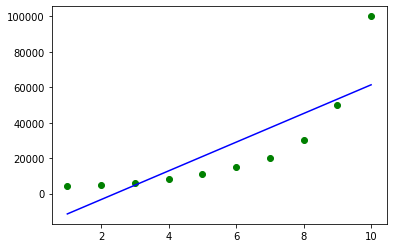

In [23]:
# visulization using LinearRegression
import matplotlib.pyplot as plt
plt.scatter(X,y,color='g')
plt.plot(X,model.predict(X),color='b')
plt.show()

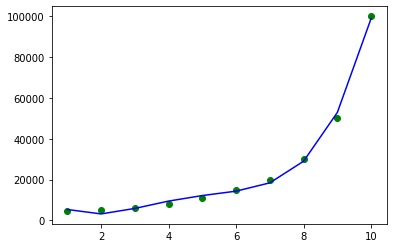

In [24]:
# visulization using poly
import matplotlib.pyplot as plt
plt.scatter(X,y,color='g')
plt.plot(X,plreg.predict(pl_x),color='b')
plt.show()

### missing values:

In [35]:
import numpy as np
import pandas as pd

a=np.array([[1,2,np.nan,3,4],[np.nan,12,13,15,17],[np.nan,21,21,24,25],[30,32,35,42,np.nan],[30,32,35,42,47]])
a

array([[ 1.,  2., nan,  3.,  4.],
       [nan, 12., 13., 15., 17.],
       [nan, 21., 21., 24., 25.],
       [30., 32., 35., 42., nan],
       [30., 32., 35., 42., 47.]])

In [36]:
df=pd.DataFrame(a)
df

,0,1,2,3,4
0,1.0,2.0,NaN,3.0,4.0
1,NaN,12.0,13.0,15.0,17.0
2,NaN,21.0,21.0,24.0,25.0
3,30.0,32.0,35.0,42.0,NaN
4,30.0,32.0,35.0,42.0,47.0


In [37]:
df.isnull().sum()

0    2
1    0
2    1
3    0
4    1
dtype: int64

In [38]:
df.dropna()

,0,1,2,3,4
4,30.0,32.0,35.0,42.0,47.0


In [39]:
from sklearn.impute import SimpleImputer

si=SimpleImputer(strategy='mean')
mydata=si.fit_transform(df)
mydata

array([[ 1.        ,  2.        , 26.        ,  3.        ,  4.        ],
       [20.33333333, 12.        , 13.        , 15.        , 17.        ],
       [20.33333333, 21.        , 21.        , 24.        , 25.        ],
       [30.        , 32.        , 35.        , 42.        , 23.25      ],
       [30.        , 32.        , 35.        , 42.        , 47.        ]])

In [40]:
df=pd.DataFrame(mydata)
df

,0,1,2,3,4
0,1.000000,2.0,26.0,3.0,4.00
1,20.333333,12.0,13.0,15.0,17.00
2,20.333333,21.0,21.0,24.0,25.00
3,30.000000,32.0,35.0,42.0,23.25
4,30.000000,32.0,35.0,42.0,47.00


In [41]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64